In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [26]:
df=pd.read_csv(r"C:\Users\jebar\OneDrive\Bureau\documents_to_read\movies.csv")

In [27]:
#first look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [28]:
#let's if there are any missing data 

for column in df.columns : 
    missing_data = np.mean(df[column].isnull())
    print("{} - {}%".format(column,missing_data))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [29]:
#data cleaning
# data types for our columns 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [30]:
#change datatype of columns 
df["budget"] = df["budget"].astype("Int64")
df["gross"] = df["gross"].astype("Int64")
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        Int64
gross         Int64
company      object
runtime     float64
dtype: object

In [31]:
# create correct year column , because the actual year column does not match the release coumn
#split first
x=df['released'].astype('str').str.split(',' , expand=True)
y=x[1].astype('str').str.split('(' , expand=True)
df['correctyear']=y[0]
df= df.drop(['year'] ,axis=1 )

In [32]:
#finally groupby the data by gross in descending view

df=df.sort_values(by='gross' , inplace=False , ascending=False )
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120.0,2020


In [48]:
#exemple:
df['company'].drop_duplicates().sort_values(ascending=False)
#drop any duplicates

df=df.drop_duplicates()
df = df.fillna(0)



In [49]:
df

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


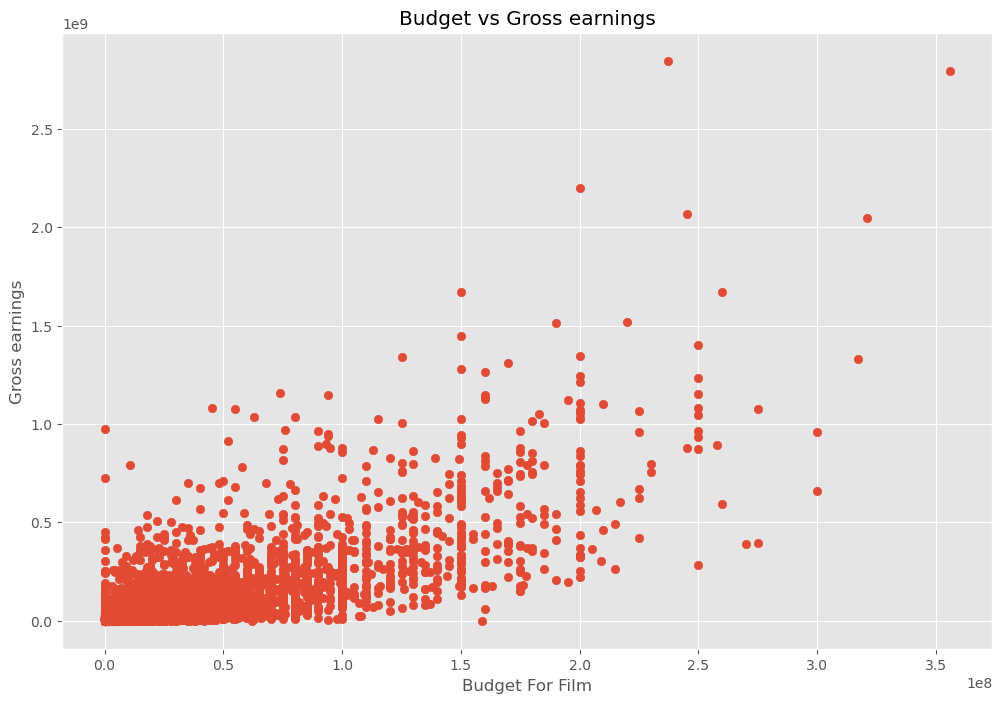

In [54]:
#exploration :
#think that budget , company have a high correlation
#scatter plot with budget vs gross
plt.scatter(x = df['budget'] , y = df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

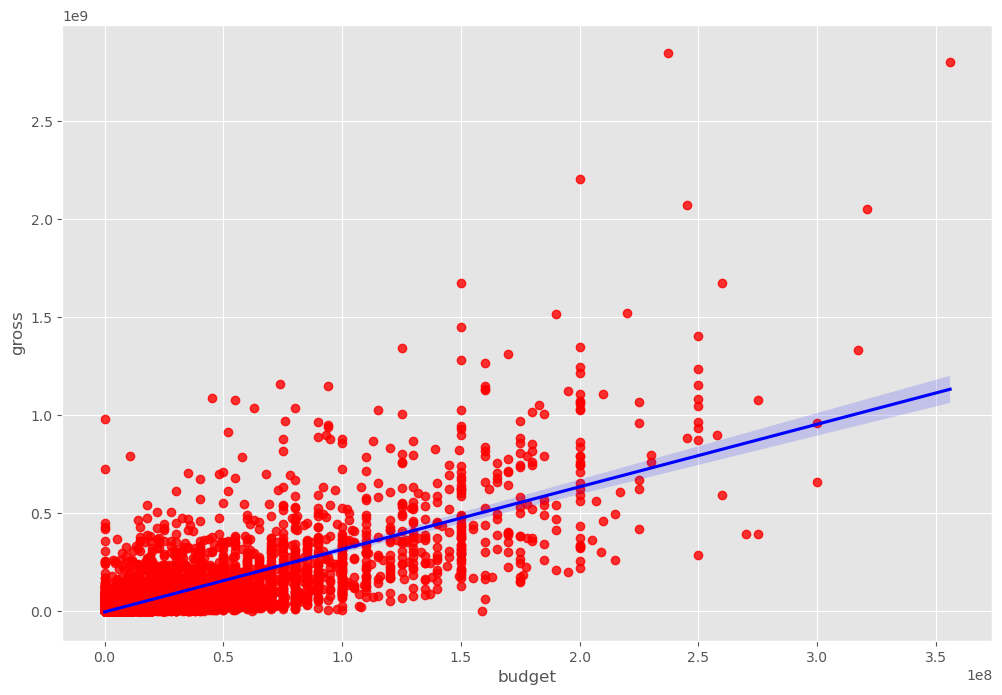

In [68]:
#plot budget vs gross using seaborn 
df["budget"] = df["budget"].astype("float64")
df["gross"] = df["gross"].astype("float64")
sns.regplot(x='budget' , y='gross' , data=df ,scatter_kws={'color':'red'} , line_kws={'color':'blue'} )


In [89]:
#let's start looking at correlation (to see the differences )
#pearson , kendall , spearman
df.corr()

C:\Users\jebar\AppData\Local\Temp\ipykernel_1040\522729403.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,score,votes,budget,gross,runtime
score,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.394564,0.306984,0.268372,0.244339,1.000000


In [90]:

cor2=df.corr(method='pearson')
cor3=df.corr(method='kendall')
cor4=df.corr(method='spearman')
print("\n\npearson_correlation","\n\n",cor2,"\n\nkendall_correlation","\n\n",cor3,"\n\nspearman_correlation","\n\n",cor4)
#it is right then,high correlation between budget and gross pearson(budget,gross) = 0.750157 , spearman(budget,gross)=0.716816 



pearson_correlation 

             score     votes    budget     gross   runtime
score    1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.394564  0.306984  0.268372  0.244339  1.000000 

kendall_correlation 

             score     votes    budget     gross   runtime
score    1.000000  0.300673 -0.004843  0.091331  0.283601
votes    0.300673  1.000000  0.439883  0.560449  0.197697
budget  -0.004843  0.439883  1.000000  0.541956  0.176184
gross    0.091331  0.560449  0.541956  1.000000  0.177429
runtime  0.283601  0.197697  0.176184  0.177429  1.000000 

spearman_correlation 

             score     votes    budget     gross   runtime
score    1.000000  0.428810 -0.007002  0.133564  0.399868
votes    0.428810  1.000000  0.604693  0.752550  0.289359
budget  -0.007002  0.604693  1.000000  0.716816  0.246

C:\Users\jebar\AppData\Local\Temp\ipykernel_1040\3885881179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor2=df.corr(method='pearson')
C:\Users\jebar\AppData\Local\Temp\ipykernel_1040\3885881179.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor3=df.corr(method='kendall')
C:\Users\jebar\AppData\Local\Temp\ipykernel_1040\3885881179.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor4=df.corr(method='spearman')


C:\Users\jebar\AppData\Local\Temp\ipykernel_1040\2851795846.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr(method='pearson')


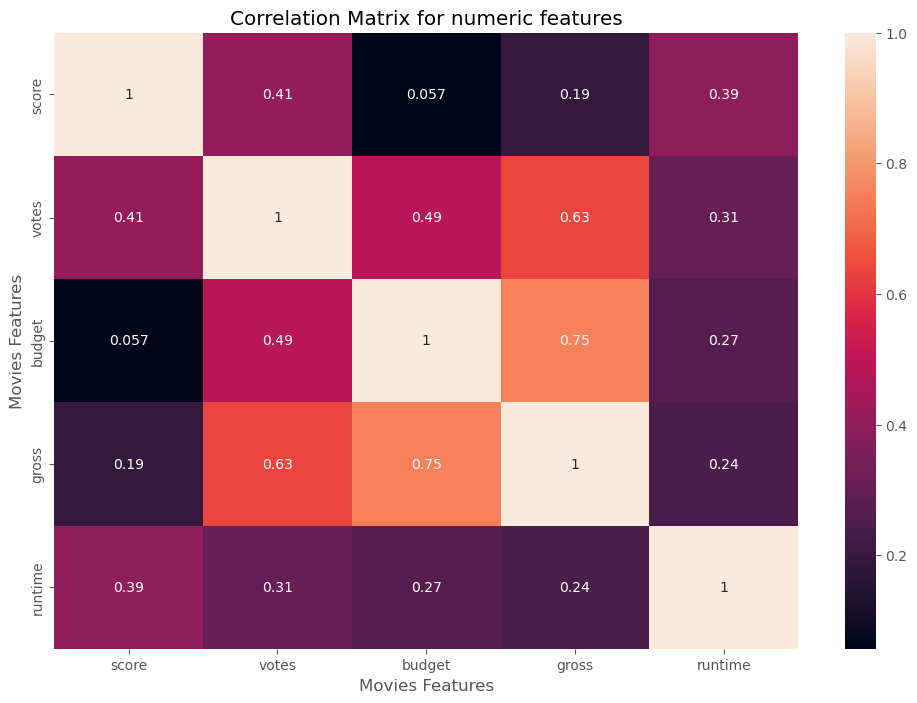

In [96]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap(correlation_matrix , annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [97]:
#looks at company
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018


In [99]:
df_numerized=df
for column_name in df_numerized.columns : 
    if(df_numerized[column_name].dtype=="object"):
        df_numerized[column_name]=df_numerized[column_name].astype("category")
        df_numerized[column_name]=df_numerized[column_name].cat.codes
df_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,533,6,0,697,7.8,1100000.0,1155,1779,2335,56,237000000.0,2.847246e+09,2254,162.0,29
7445,535,6,0,184,8.4,903000.0,162,744,2242,56,356000000.0,2.797501e+09,1607,181.0,39
3045,6896,6,6,705,7.8,1100000.0,1155,1779,1596,56,200000000.0,2.201647e+09,2254,194.0,17
6663,5144,6,0,699,7.8,876000.0,1125,2551,525,56,245000000.0,2.069522e+09,1541,138.0,35
7244,536,6,0,193,8.4,897000.0,162,744,2242,56,321000000.0,2.048360e+09,1607,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,2965,3.1,18.0,1500,2290,2422,56,7000.0,0.000000e+00,0,90.0,40
7664,1678,0,4,1108,4.7,36.0,774,2615,1887,56,0.0,0.000000e+00,540,90.0,40
7665,4717,0,6,194,5.7,29.0,2061,2684,2041,56,58750.0,0.000000e+00,942,0.0,40
7666,2843,0,6,2818,0.0,0.0,1184,1825,451,56,15000.0,0.000000e+00,0,120.0,40


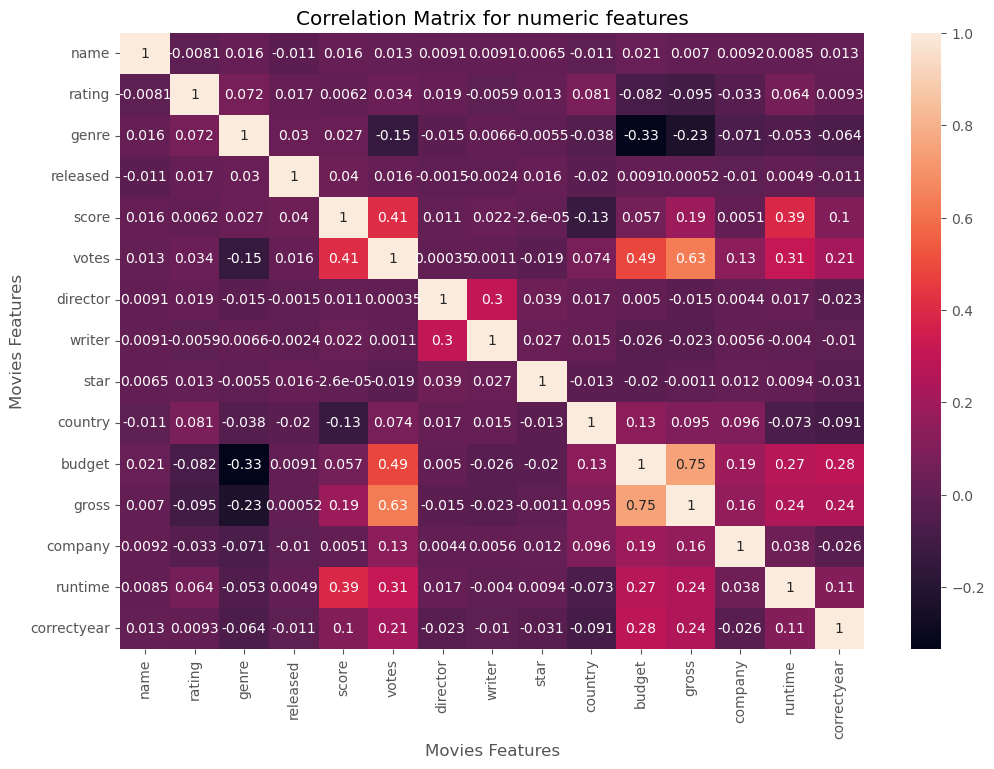

In [101]:
correlation_matrix=df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix , annot=True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [104]:
pd.set_option('display.max_rows', None)
correlation_mat= df_numerized.corr()
correlation_pairs=correlation_mat.unstack()
sorted_pairs=correlation_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
             votes         -0.145296
votes        genre         -0.145296
score        country       -0.133346
country      score         -0.133346
gross        rating        -0.095450
rating       gross         -0.095450
correctyear  country       -0.090962
country      correctyear   -0.090962
budget       rating        -0.081939
rating       budget        -0.081939
runtime      country       -0.073319
country      runtime       -0.073319
company      genre         -0.071067
genre        company       -0.071067
             correctyear   -0.063573
correctyear  genre         -0.063573
genre        runtime       -0.052914
runtime      genre         -0.052914
genre        country       -0.037615
country      genre         -0.037615
rating       company       -0.032943
company      rating        -0.032943
star         correctyear   -0.031166
c

In [107]:
High_correlation = sorted_pairs[(sorted_pairs) > 0.5]
High_correlation

votes        gross          0.632870
gross        votes          0.632870
             budget         0.750157
budget       gross          0.750157
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64

In [ ]:
#votes and budget have the high correlation to the gross earnings
#company has low correlation